# Exercise 6.4 Supervised Machine Learning: Regression

## This script contains the following:
01. Importing libraries and data
02. Data cleaning
03. Data prep for regression analysis
04. Regression analysis
Bonus: performance improvement after removing outliers

# 01. Importing Libraries and Data

In [10]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [14]:
path = r"C:\Users\kthav\My Pc\Desktop\Career Foundry\Sourcing Open Data\Final Project"

In [18]:
# import data merged_clean.csv as df

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'merged_clean.csv'), index_col = False)

# 02. Data Cleaning

In [21]:
df.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [23]:
df.head(20)

Unnamed: 0               Country                           Region  \
0            0           Switzerland                   Western Europe   
1            1               Iceland                   Western Europe   
2            2               Denmark                   Western Europe   
3            3                Norway                   Western Europe   
4            4                Canada                    North America   
5            5               Finland                   Western Europe   
6            6           Netherlands                   Western Europe   
7            7                Sweden                   Western Europe   
8            8           New Zealand        Australia and New Zealand   
9            9             Australia        Australia and New Zealand   
10          10                Israel  Middle East and Northern Africa   
11          11            Costa Rica      Latin America and Caribbean   
12          12               Austria                   Western Europe   
13          13                Mexico      Latin America and Caribbean   
14          14         United States                    North America   
15          15                Brazil      Latin America and Caribbean   
16          16            Luxembourg                   Western Europe   
17          17               Ireland                   Western Europe   
18          18               Belgium                   Western Europe   
19          19  United Arab Emirates  Middle East and Northern Africa   

    Happiness Rank  Happiness Score  Economy (GDP per Capita)   Family  \
0                1            7.587                   1.39651  1.34951   
1                2            7.561                   1.30232  1.40223   
2                3            7.527                   1.32548  1.36058   
3                4            7.522                   1.45900  1.33095   
4                5            7.427                   1.32629  1.32261   
5                6            7.406                   1.29025  1.31826   
6                7            7.378                   1.32944  1.28017   
7                8            7.364                   1.33171  1.28907   
8                9            7.286                   1.25018  1.31967   
9               10            7.284                   1.33358  1.30923   
10              11            7.278                   1.22857  1.22393   
11              12            7.226                   0.95578  1.23788   
12              13            7.200                   1.33723  1.29704   
13              14            7.187                   1.02054  0.91451   
14              15            7.119                   1.39451  1.24711   
15              16            6.983                   0.98124  1.23287   
16              17            6.946                   1.56391  1.21963   
17              18            6.940                   1.33596  1.36948   
18              19            6.937                   1.30782  1.28566   
19              20            6.901                   1.42727  1.12575   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                    0.94143  0.66557                        0.41978   
1                    0.94784  0.62877                        0.14145   
2                    0.87464  0.64938                        0.48357   
3                    0.88521  0.66973                        0.36503   
4                    0.90563  0.63297                        0.32957   
5                    0.88911  0.64169                        0.41372   
6                    0.89284  0.61576                        0.31814   
7                    0.91087  0.65980                        0.43844   
8                    0.90837  0.63938                        0.42922   
9                    0.93156  0.65124                        0.35637   
10                   0.91387  0.41319                        0.07785   
11                   0.86027  0.63376              

In [25]:
df.shape

(782, 12)

In [27]:
# rename columns to improve readability 
df.rename(columns = {'Economy (GDP per Capita)' : 'Economy', 
                     'Health (Life Expectancy)' : 'Health', 'Trust (Government Corruption)' : 'Government Trust' },
          inplace = True)

In [29]:
df.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy', 'Family', 'Health', 'Freedom', 'Government Trust',
       'Generosity', 'Year'],
      dtype='object')

In [37]:
# check for missing values

df.isnull().sum()

Country              0
Region              19
Happiness Rank       0
Happiness Score      0
Economy              0
Family               0
Health               0
Freedom              0
Government Trust     0
Generosity           0
Year                 0
dtype: int64

In [39]:
# Filter rows with any null values
rows_with_nulls = df[df.isnull().any(axis=1)]

# Display the rows
print(rows_with_nulls)


                      Country Region  Happiness Rank  Happiness Score  \
347  Taiwan Province of China    NaN              33            6.422   
364                    Belize    NaN              50            5.956   
385   Hong Kong S.A.R., China    NaN              71            5.472   
407                   Somalia    NaN              93            5.151   
425                   Namibia    NaN             111            4.574   
461               South Sudan    NaN             147            3.591   
507         Trinidad & Tobago    NaN              38            6.192   
518                    Belize    NaN              49            5.956   
527           Northern Cyprus    NaN              58            5.835   
567                   Somalia    NaN              98            4.982   
588                   Namibia    NaN             119            4.441   
623               South Sudan    NaN             154            3.254   
664         Trinidad & Tobago    NaN              3

Regions are not important for this regression test so no action would be taken

In [43]:
# check for duplicates

dups = df.duplicated()

In [45]:
dups.shape

(782,)

No duplicates so no further action is required.

C:\Users\kthav\AppData\Local\Temp\ipykernel_15016\2665110844.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Economy'])


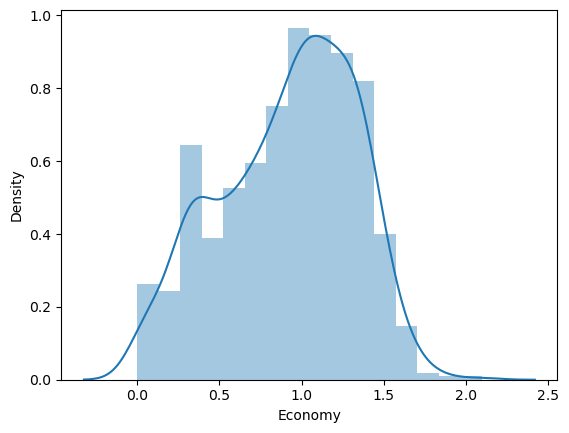

In [91]:
# check for extreme values

sns.distplot(df['Economy'])

plt.show()


The Family variable distribution is approximately normal with a slight left skew. While there are low values near 0, they do not appear to be extreme outliers, and the distribution tapers off smoothly at both ends.

# 03. Data Prep for Regression Analysis

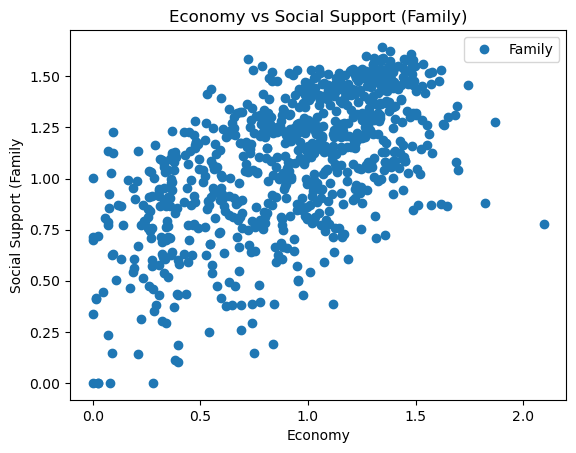

In [115]:
# Create a scatterplot 

df.plot(x = 'Economy', y='Family',style='o') 
plt.title('Economy vs Social Support (Family)')  
plt.xlabel('Economy')  
plt.ylabel('Social Support (Family')  
plt.show()

The scatterplot shows that countries with higher GDP per capita tend to have higher social support, suggesting a positive relationship. While the trend is clear, there’s some variation, and a few countries don’t follow the pattern.

Hypothesis:
Countries with higher GDP per capita tend to have higher levels of social support.

In [100]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Economy'].values.reshape(-1,1)
y = df['Family'].values.reshape(-1,1)

In [102]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [104]:
y

array([[1.34951   ],
       [1.40223   ],
       [1.36058   ],
       [1.33095   ],
       [1.32261   ],
       [1.31826   ],
       [1.28017   ],
       [1.28907   ],
       [1.31967   ],
       [1.30923   ],
       [1.22393   ],
       [1.23788   ],
       [1.29704   ],
       [0.91451   ],
       [1.24711   ],
       [1.23287   ],
       [1.21963   ],
       [1.36948   ],
       [1.28566   ],
       [1.12575   ],
       [1.28548   ],
       [1.08182   ],
       [1.25596   ],
       [1.02      ],
       [1.1985    ],
       [1.29937   ],
       [1.12447   ],
       [1.0786    ],
       [1.26038   ],
       [1.24823   ],
       [1.20643   ],
       [1.2089    ],
       [1.24018   ],
       [1.26504   ],
       [1.08393   ],
       [1.31379   ],
       [1.30203   ],
       [1.07617   ],
       [1.16594   ],
       [0.972     ],
       [1.18354   ],
       [1.02507   ],
       [1.04356   ],
       [1.34043   ],
       [1.26999   ],
       [1.25712   ],
       [0.95774   ],
       [0.999

In [106]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04 Regression Analysis

In [109]:
# Create a regression object.

regression = LinearRegression() 

In [111]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [113]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

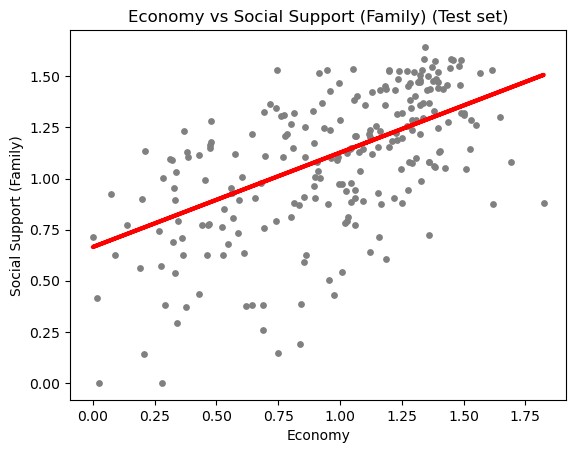

In [117]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Economy vs Social Support (Family) (Test set)')
plot_test.xlabel('Economy')
plot_test.ylabel('Social Support (Family)')
plot_test.show()

In [121]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [123]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.46174031]]
Mean squared error:  0.07802923611358871
R2 score:  0.343642248281833


Slope ([[0.46174031]])
The positive slope shows that as the independent variable (X) increases, the dependent variable (y) also increases by about 0.46 units. This indicates a moderate positive relationship between the two variables.

Mean Squared Error (MSE: 0.0780)
The MSE is low, meaning the model’s predictions are close to the actual values. This suggests the regression line fits the data fairly well, but it’s not perfect.

R2 score:  0.343642248281833
The R² score of 0.3436 means the model explains about 34% of the variation in the dependent variable. This suggests the independent variable has some influence, but most of the variation (around 66%) is due to other factors the model doesn’t account for.

While the model captures part of the relationship, it isn’t performing particularly well overall. 

In [126]:
y_predicted

array([[1.17372374],
       [1.31048981],
       [1.37172745],
       [1.30887833],
       [0.79666519],
       [1.1991518 ],
       [0.84274687],
       [1.00683553],
       [1.32313687],
       [1.21282711],
       [1.15518807],
       [1.20286737],
       [0.83074163],
       [1.0870075 ],
       [0.67204148],
       [1.29270357],
       [0.88484858],
       [1.08081867],
       [1.18256004],
       [1.06101116],
       [1.50731585],
       [0.6986839 ],
       [0.93001579],
       [1.29386715],
       [1.44551191],
       [1.29848456],
       [1.23245569],
       [1.3035637 ],
       [0.86402636],
       [1.29109671],
       [1.42638662],
       [1.32895942],
       [1.19469919],
       [0.75316925],
       [1.30033152],
       [1.13133457],
       [0.6769821 ],
       [1.14677978],
       [1.26118306],
       [1.22452761],
       [0.81746197],
       [1.30913535],
       [1.00897338],
       [1.15487409],
       [1.27909146],
       [1.24223535],
       [1.21121564],
       [1.039

In [130]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0   1.357564   1.173724
1   1.471000   1.310490
2   1.286678   1.371727
3   1.247110   1.308878
4   1.002680   0.796665
5   0.711551   1.199152
6   1.105000   0.842747
7   0.791170   1.006836
8   1.052490   1.323137
9   0.608090   1.212827
10  1.208900   1.155188
11  0.877170   1.202867
12  0.711000   0.830742
13  1.517000   1.087007
14  0.415870   0.672041
15  0.721940   1.292704
16  1.281473   0.884849
17  1.007484   1.080819
18  1.202150   1.182560
19  1.253918   1.061011
20  0.879640   1.507316
21  0.922000   0.698684
22  1.122000   0.930016
23  1.368000   1.293867
24  1.078600   1.445512
25  1.548000   1.298485
26  1.191000   1.232456
27  1.573000   1.303564
28  0.435300   0.864026
29  1.504000   1.291097

The model shows significant differences between actual and predicted values, indicating it’s not performing well. While it captures a general trend, it struggles with consistency, sometimes overpredicting and other times underpredicting. This inconsistency suggests that the model isn’t accurately capturing the relationship between the variables and needs improvement.

In [139]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [141]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [143]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.46174031]]
Mean squared error:  0.06846379382741255
R2 score:  0.34159933169886725


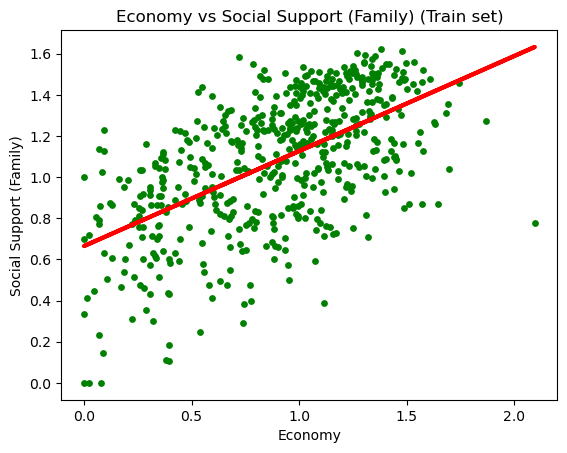

In [147]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Economy vs Social Support (Family) (Train set)')
plot_test.xlabel('Economy')
plot_test.ylabel('Social Support (Family)')
plot_test.show()



The model shows a moderate positive relationship between the variables, as indicated by the slope. However, the low R² score of 0.34 suggests the model isn’t performing well, even on the training data, as it explains only 34% of the variation in the dependent variable. While the MSE is low, it doesn’t fully capture the model’s limited ability to explain the overall variability.

Comparison with the Test Set:

The model’s performance on the test set is similar to the training set, with an R² score also around 0.34. This indicates that the model doesn’t improve much when applied to unseen data, confirming that it’s not capturing the full relationship. Both the training and test results show the need for additional predictors or a more sophisticated approach to improve accuracy and generalizability.

Data Bias:
The dataset is relatively small, which limits the model’s ability to generalize and may lead to unreliable predictions. Additionally, since the data is based on survey results, there is potential for bias, such as:

Selection Bias: Certain groups may be overrepresented or underrepresented in the survey, skewing the results.
Response Bias: Participants might not answer questions honestly or could interpret questions differently.
Cultural Bias: Social norms and cultural differences could influence how respondents perceive and report their experiences.
Sampling Bias (only 3000): If the survey sample isn’t representative of the entire population, the data may not accurately reflect broader trends.
These biases could impact the accuracy and reliability of the model, highlighting the need for a larger and more diverse dataset to improve its robustness.